## <center>Compare Foxtrot and PyFAI -Intensity shift-</center>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d


In [2]:
def extract_numpy_from_files(pyFAI_raw_path, trans_pyFAI_path, foxtrot_path, foxtot_modified_path,mi8,time,skiprows):
    #load files
    #pyFAI files:
    pyFAI_raw = np.loadtxt(pyFAI_raw_path, comments='#')
    trans_pyFAI = np.loadtxt(trans_pyFAI_path)
    trans_pyFAI_mean = np.mean(trans_pyFAI)
    #Foxtrot file
    Foxtrot = np.loadtxt(foxtrot_path, skiprows=skiprows)
    Foxtrot_modified = np.loadtxt(foxtot_modified_path, skiprows=1)

    #Extract intensity and q from numpy array
     # Extract PyFAI
    q_pyFAI_raw = pyFAI_raw[:, 0]  # First column (q_iso)
    i_pyFAI_raw = pyFAI_raw[:, 1]  # Second column (i_iso)
    #correction transmission
    i_pyFAI_trans_corr = i_pyFAI_raw/trans_pyFAI_mean 

    #correction with formula  (mi_8B_sample/mi_5_sample)/(mi_8B_air/mi_5_air)
    i_pyFAI_xtimexmi8  = i_pyFAI_raw/(time*mi8*30700)


    #Extract Foxtrot
    q_Foxtrot = Foxtrot[:, 0]  # First column (q_iso)
    i_Foxtrot = Foxtrot[:, 1]  # Second column (i_iso)

    #Extract Foxtrot with modified macro
    q_Foxtrot_modified = Foxtrot_modified[:, 0]  # First column (q_iso)
    i_Foxtrot_modified = Foxtrot_modified[:, 1]  # Second column (i_iso)



    print("time.mi8 =",10000*time*mi8 )

    return i_pyFAI_raw, i_pyFAI_trans_corr,i_pyFAI_xtimexmi8, q_pyFAI_raw, i_Foxtrot, q_Foxtrot, i_Foxtrot_modified, q_Foxtrot_modified

In [3]:
def plot_data(i_pyFAI_raw,i_pyFAI_xtimexmi8 , q_pyFAI_raw, i_Foxtrot, q_Foxtrot,i_Foxtrot_modified, q_Foxtrot_modified,title):
    fig,ax = plt.subplots()
    ax.loglog(q_pyFAI_raw,i_pyFAI_raw, color='b',label='Raw PyFAI')
    #ax.loglog(q_pyFAI_raw,i_pyFAI_trans_corr, color='g',label='Transmission corr PyFAI')
    ax.loglog(q_Foxtrot,i_Foxtrot, color='r',label='Foxtrot Macro:  normalize=True')
    ax.loglog(q_pyFAI_raw,i_pyFAI_xtimexmi8, color='yellow',linestyle='-.',label='raw PyFAI time*mi8*30700')
    
    ax.loglog(q_Foxtrot_modified, i_Foxtrot_modified, color='pink',linestyle='-.',label='Foxtrot Macro normalize=False')

    ax.set_title(title)
    
    ax.set_xlabel('q')
    ax.set_ylabel('i')
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

In [4]:
def ratio(q_Foxtrot, i_Foxtrot,i_pyFAI_raw,i_pyFAI_trans_corr,i_pyFAI_xtimexmi8,q_pyFAI_raw):
    # Create an interpolation function
    f = interp1d(q_Foxtrot, i_Foxtrot, bounds_error=False, fill_value='extrapolate')
    # Interpolate i_Foxtrot to match the shape of i_pyFAI_raw
    i_Foxtrot_interpolated = f(q_pyFAI_raw)
    ratio_raw = i_pyFAI_raw / i_Foxtrot_interpolated
    mean_ratio_raw = np.mean(ratio_raw[1:-1])
    sigma_ratio_raw = np.std(ratio_raw[1:-1])

    ratio_trans = i_pyFAI_trans_corr/ i_Foxtrot_interpolated
    mean_ratio_trans = np.mean(ratio_trans[1:-1])
    sigma_ratio_trans = np.std(ratio_trans[1:-1])

    ratio_time_mi8 = i_pyFAI_xtimexmi8/ i_Foxtrot_interpolated
    mean_ratio_time_mi8 = np.mean(ratio_time_mi8[1:-1])
    sigma_ratio_time_mi8 = np.std(ratio_time_mi8[1:-1])




    return mean_ratio_raw, sigma_ratio_raw, mean_ratio_trans, sigma_ratio_trans,mean_ratio_time_mi8,sigma_ratio_time_mi8

In [5]:
def plot_data_ratios(q_pyFAI_raw,i_pyFAI_raw,q_Foxtrot,i_Foxtrot,i_pyFAI_trans_corr,i_pyFAI_xtimexmi8,sample,mean_ratio_raw,mean_ratio_trans,mean_ratio_time_mi8):
    fig,ax = plt.subplots(1,3,figsize=(12, 6))
    fig.suptitle(f'Data Ratios for Sample: {sample}', fontsize=16)
    ax[0].loglog(q_pyFAI_raw,i_pyFAI_raw/mean_ratio_raw, color='c',label='Raw PyFAI/'+f'{mean_ratio_raw:.2f}')
    ax[0].loglog(q_Foxtrot,i_Foxtrot, color='r',linestyle='-.',label='Foxtrot')
    ax[0].set_xlabel('q')
    ax[0].set_ylabel('i')
    ax[0].legend()

    ax[1].loglog(q_pyFAI_raw,i_pyFAI_trans_corr/mean_ratio_trans, color='c',label='Trans corr PyFAI/'+f'{mean_ratio_trans:.2f}')
    ax[1].loglog(q_Foxtrot,i_Foxtrot, color='g',linestyle='-.',label='Foxtrot')
    ax[1].set_xlabel('q')
    ax[1].set_ylabel('i')
    ax[1].legend()

    ax[2].loglog(q_pyFAI_raw,i_pyFAI_xtimexmi8/mean_ratio_time_mi8, color='orange',label='time mi8 corr PyFAI/'+f'{mean_ratio_time_mi8:.2f}')
    ax[2].loglog(q_Foxtrot,i_Foxtrot, color='g',linestyle='-.',label='Foxtrot')
    ax[2].set_xlabel('q')
    ax[2].set_ylabel('i')
    ax[2].legend()



- kin_6
---

time.mi8 = 0.112854
mean_ratio_raw:  0.35
mean_ratio_trans:  0.64
----------
sigma_ratio_raw:  0.0069
sigma_ratio_trans:  0.0127


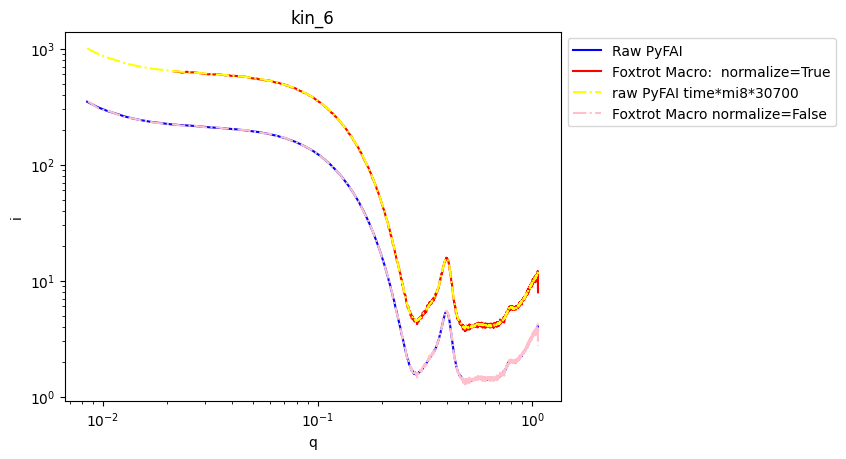

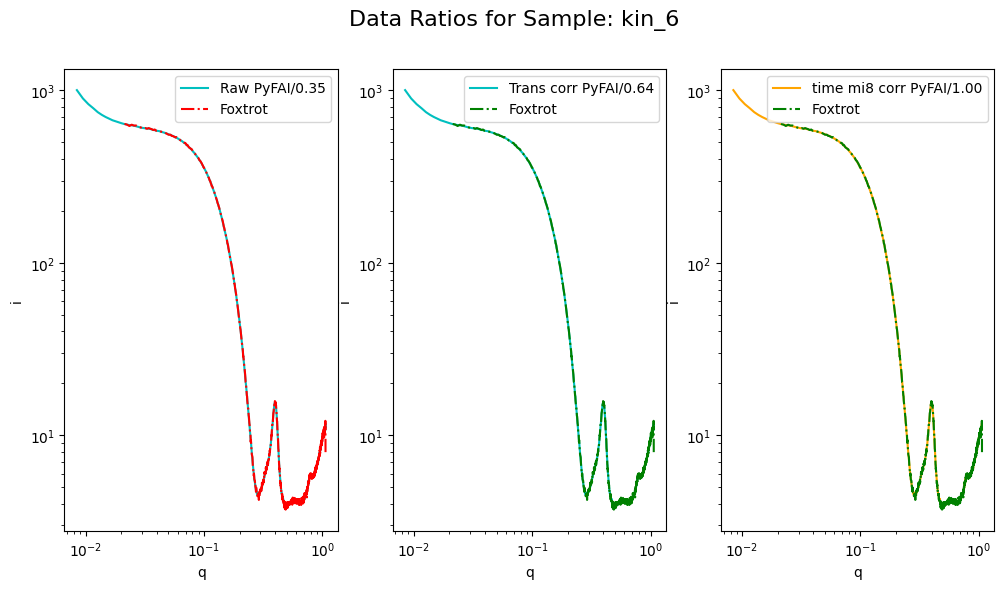

In [6]:
sample = 'kin_6'
pyFAI_raw_path =  'D:/SWING/to_do/kin_6/S_C_2_SF_7_P_20_01089/integration/rodriguez_01089_2024-10-11_04-33-50_integration_mean.txt'
trans_pyFAI_path  = 'D:/SWING/to_do/kin_6/S_C_2_SF_7_P_20_01089/transmission/rodriguez_01089_2024-10-11_04-33-50_transmission.txt'
foxtrot_path =  'C:/Users/cayez/Documents/DONNEES_SIMON/LPCNO/Synchrotron/SoleilSWING_octobre24/Notebook_traitement/pb_intensite/fichiers_rodriguez/sf6_01089.txt'
foxtot_modified_path = 'C:/Users/cayez/Documents/DONNEES_SIMON/LPCNO/Synchrotron/SoleilSWING_octobre24/Notebook_traitement/pb_intensite/fichiers_rodriguez/NormalizeFalse_01089.txt'



i_pyFAI_raw, i_pyFAI_trans_corr,i_pyFAI_xtimexmi8, q_pyFAI_raw, i_Foxtrot, q_Foxtrot, i_Foxtrot_modified, q_Foxtrot_modified = extract_numpy_from_files(pyFAI_raw_path, trans_pyFAI_path, foxtrot_path,foxtot_modified_path,5.6427e-8,200,21);
plot_data(i_pyFAI_raw, i_pyFAI_xtimexmi8 , q_pyFAI_raw, i_Foxtrot, q_Foxtrot, i_Foxtrot_modified, q_Foxtrot_modified,sample)
mean_ratio_raw, sigma_ratio_raw, mean_ratio_trans, sigma_ratio_trans,mean_ratio_time_mi8,sigma_ratio_time_mi8 = ratio(q_Foxtrot, i_Foxtrot,i_pyFAI_raw,i_pyFAI_trans_corr,i_pyFAI_xtimexmi8,q_pyFAI_raw)
print('mean_ratio_raw: ',f'{mean_ratio_raw:.2f}')
print('mean_ratio_trans: ',f'{mean_ratio_trans:.2f}')
print('----------')
print('sigma_ratio_raw: ',f'{sigma_ratio_raw:.4f}')
print('sigma_ratio_trans: ',f'{sigma_ratio_trans:.4f}')
plot_data_ratios(q_pyFAI_raw,i_pyFAI_raw,q_Foxtrot,i_Foxtrot,i_pyFAI_trans_corr,i_pyFAI_xtimexmi8,sample,mean_ratio_raw,mean_ratio_trans,mean_ratio_time_mi8)

- kin_11
---

time.mi8 = 0.14987250000000002
mean_ratio_raw:  0.46
mean_ratio_trans:  0.79
----------
sigma_ratio_raw:  0.0011
sigma_ratio_trans:  0.0019


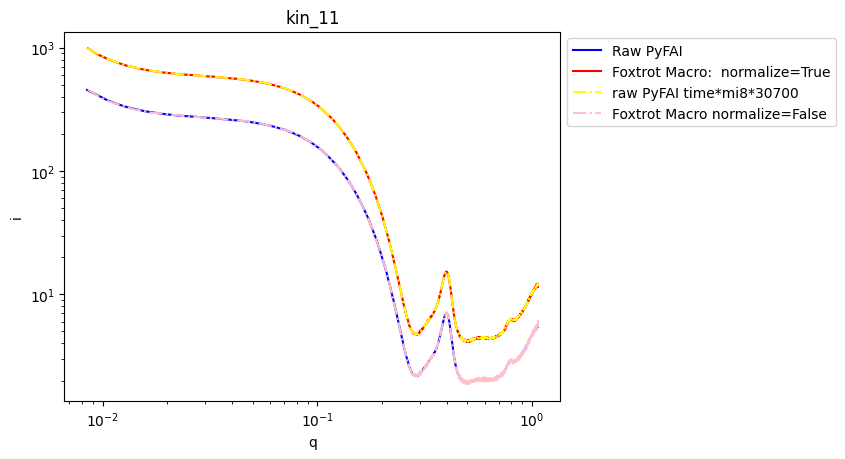

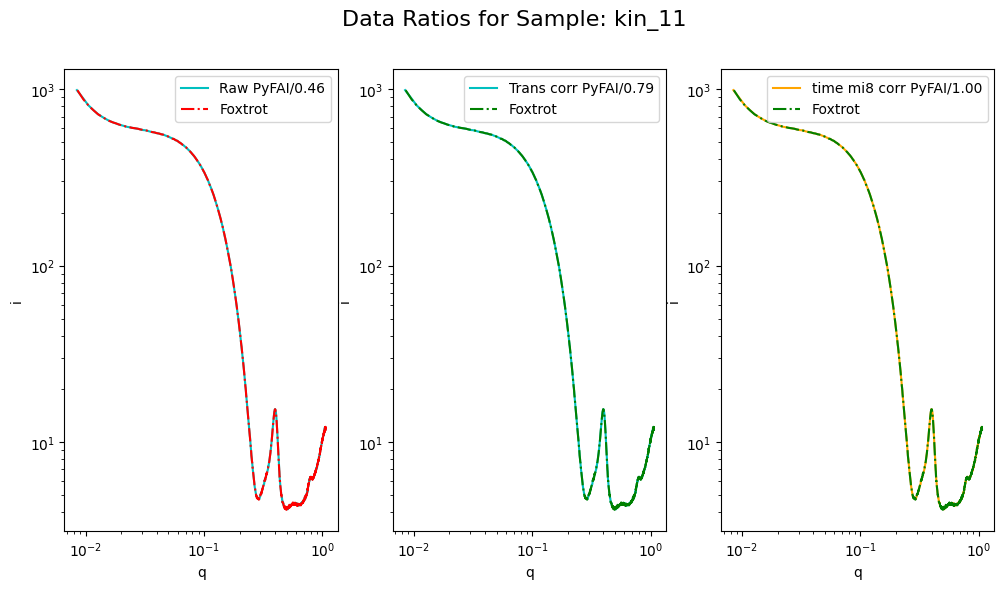

In [7]:
sample = 'kin_11'
pyFAI_raw_path =  'D:/SWING/to_do/kin_11_ag_55deg/S_C_2_SF_2_P_31_02399/integration/rodriguez_02399_2024-10-11_17-10-50_integration_mean.txt'
trans_pyFAI_path  = 'D:/SWING/to_do/kin_11_ag_55deg/S_C_2_SF_2_P_31_02399/transmission/rodriguez_02399_2024-10-11_17-10-50_transmission.txt'
foxtrot_path =  'C:/Users/cayez/Documents/DONNEES_SIMON/LPCNO/Synchrotron/SoleilSWING_octobre24/Notebook_traitement/pb_intensite/fichiers_rodriguez/Ave_14_S_C_2_SF_2_P_31_02399AzInt_Px.dat'
foxtot_modified_path = 'C:/Users/cayez/Documents/DONNEES_SIMON/LPCNO/Synchrotron/SoleilSWING_octobre24/Notebook_traitement/pb_intensite/fichiers_rodriguez/NormalizeFalse_02399.txt'

i_pyFAI_raw, i_pyFAI_trans_corr,i_pyFAI_xtimexmi8 , q_pyFAI_raw, i_Foxtrot, q_Foxtrot,i_Foxtrot_modified, q_Foxtrot_modified = extract_numpy_from_files(pyFAI_raw_path, trans_pyFAI_path, foxtrot_path,foxtot_modified_path,5.9949e-8,250,21);
plot_data(i_pyFAI_raw, i_pyFAI_xtimexmi8 , q_pyFAI_raw, i_Foxtrot, q_Foxtrot, i_Foxtrot_modified, q_Foxtrot_modified,sample)
mean_ratio_raw, sigma_ratio_raw, mean_ratio_trans, sigma_ratio_trans,mean_ratio_time_mi8,sigma_ratio_time_mi8 = ratio(q_Foxtrot, i_Foxtrot,i_pyFAI_raw,i_pyFAI_trans_corr,i_pyFAI_xtimexmi8,q_pyFAI_raw)
print('mean_ratio_raw: ',f'{mean_ratio_raw:.2f}')
print('mean_ratio_trans: ',f'{mean_ratio_trans:.2f}')
print('----------')
print('sigma_ratio_raw: ',f'{sigma_ratio_raw:.4f}')
print('sigma_ratio_trans: ',f'{sigma_ratio_trans:.4f}')
plot_data_ratios(q_pyFAI_raw,i_pyFAI_raw,q_Foxtrot,i_Foxtrot,i_pyFAI_trans_corr,i_pyFAI_xtimexmi8,sample,mean_ratio_raw,mean_ratio_trans,mean_ratio_time_mi8)

- kin_21
---

time.mi8 = 0.1273725
mean_ratio_raw:  0.39
mean_ratio_trans:  0.63
----------
sigma_ratio_raw:  0.0012
sigma_ratio_trans:  0.0019


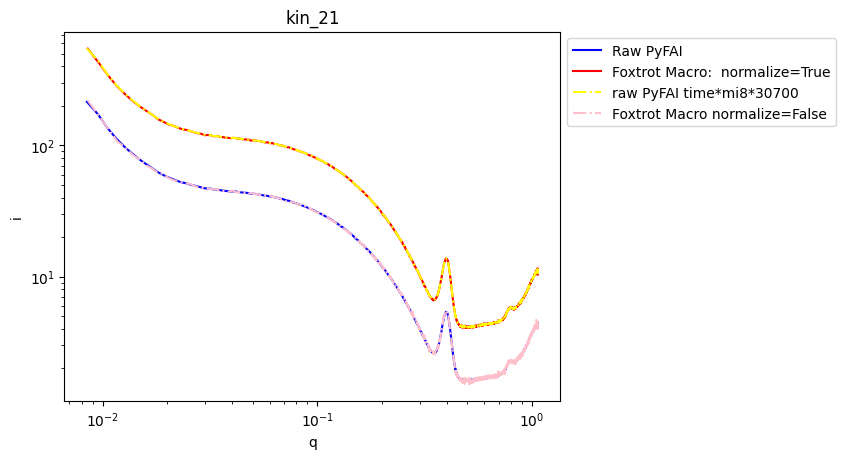

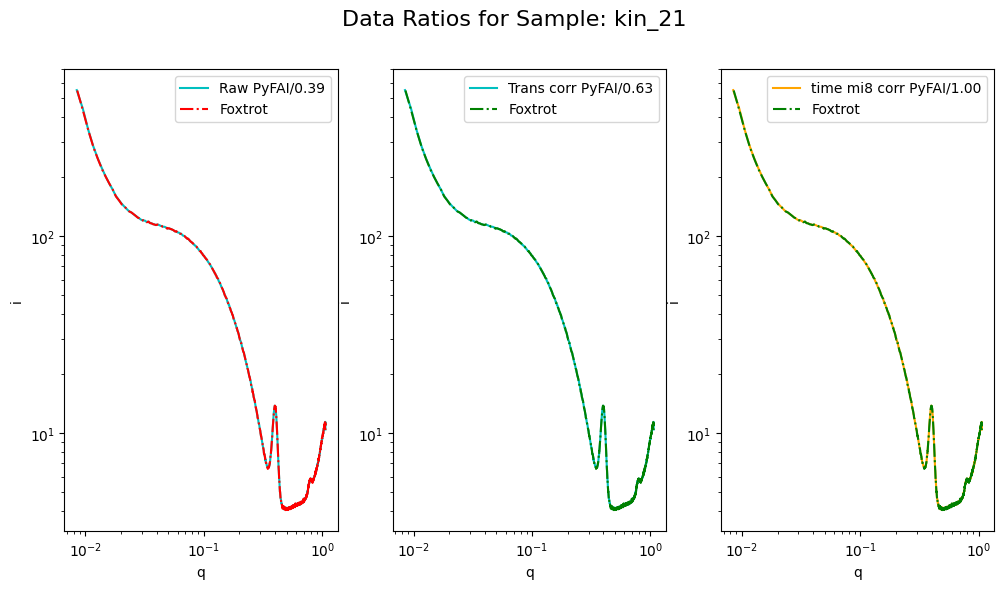

In [8]:
sample = 'kin_21'
pyFAI_raw_path = 'D:/SWING/to_do/kin_21_au_500tes/S_C_2_SF_4_P_1_05068/integration/rodriguez_05068_2024-10-12_12-17-56_integration_mean.txt'
trans_pyFAI_path = 'D:/SWING/to_do/kin_21_au_500tes/S_C_2_SF_4_P_1_05068/transmission/rodriguez_05068_2024-10-12_12-17-56_transmission.txt'
foxtrot_path =  'C:/Users/cayez/Documents/DONNEES_SIMON/LPCNO/Synchrotron/SoleilSWING_octobre24/Notebook_traitement/pb_intensite/fichiers_rodriguez/Ave_85_S_C_2_SF_4_P_1_05068AzInt_Px.dat'
foxtot_modified_path = 'C:/Users/cayez/Documents/DONNEES_SIMON/LPCNO/Synchrotron/SoleilSWING_octobre24/Notebook_traitement/pb_intensite/fichiers_rodriguez/NormalizeFalse_05068.txt'

# i_pyFAI_raw, i_pyFAI_trans_corr,i_pyFAI_mi5mi8_corr , q_pyFAI_raw, i_Foxtrot, q_Foxtrot,i_Foxtrot_modified, q_Foxtrot_modified,title


i_pyFAI_raw, i_pyFAI_trans_corr,i_pyFAI_xtimexmi8 , q_pyFAI_raw, i_Foxtrot, q_Foxtrot,i_Foxtrot_modified, q_Foxtrot_modified = extract_numpy_from_files(pyFAI_raw_path, trans_pyFAI_path, foxtrot_path,foxtot_modified_path,5.0949e-8,250,21);
plot_data(i_pyFAI_raw, i_pyFAI_xtimexmi8 , q_pyFAI_raw, i_Foxtrot, q_Foxtrot, i_Foxtrot_modified, q_Foxtrot_modified,sample)
mean_ratio_raw, sigma_ratio_raw, mean_ratio_trans, sigma_ratio_trans,mean_ratio_time_mi8,sigma_ratio_time_mi8 = ratio(q_Foxtrot, i_Foxtrot,i_pyFAI_raw,i_pyFAI_trans_corr,i_pyFAI_xtimexmi8,q_pyFAI_raw)
print('mean_ratio_raw: ',f'{mean_ratio_raw:.2f}')
print('mean_ratio_trans: ',f'{mean_ratio_trans:.2f}')
print('----------')
print('sigma_ratio_raw: ',f'{sigma_ratio_raw:.4f}')
print('sigma_ratio_trans: ',f'{sigma_ratio_trans:.4f}')
plot_data_ratios(q_pyFAI_raw,i_pyFAI_raw,q_Foxtrot,i_Foxtrot,i_pyFAI_trans_corr,i_pyFAI_xtimexmi8,sample,mean_ratio_raw,mean_ratio_trans,mean_ratio_time_mi8)

- kin_23
---

time.mi8 = 0.1322925
mean_ratio_raw:  0.41
mean_ratio_trans:  0.63
----------
sigma_ratio_raw:  0.0062
sigma_ratio_trans:  0.0096


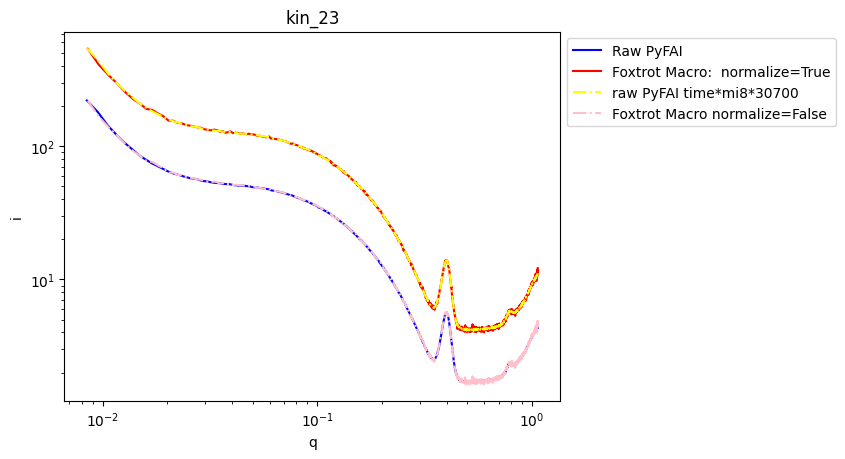

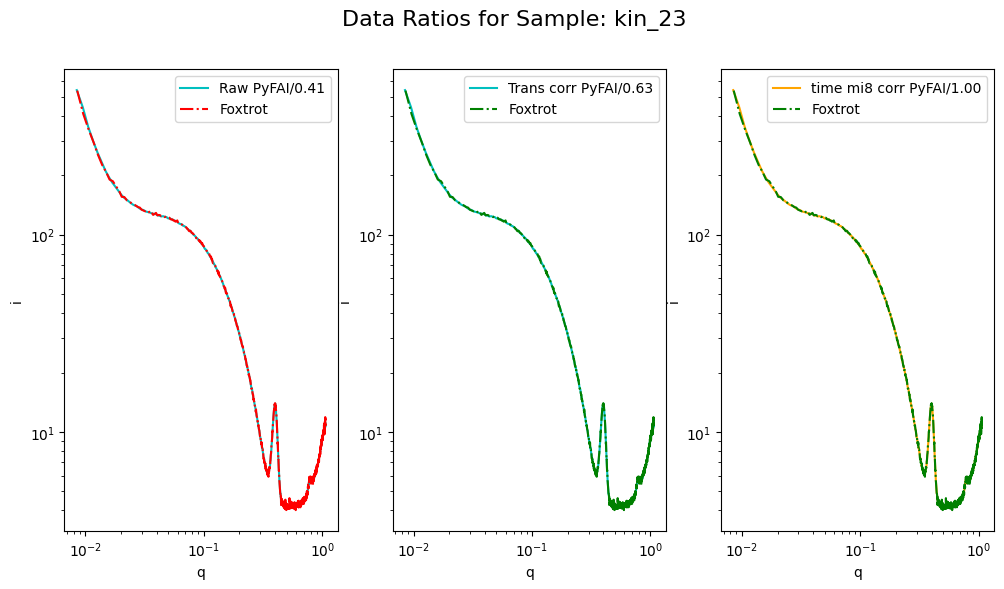

In [9]:
sample = 'kin_23'
pyFAI_raw_path = 'D:/SWING/to_do/kin_23_au_125tes_rt/S_C_2_SF_3_P_37_05732/integration/rodriguez_05732_2024-10-12_16-28-00_integration_mean.txt'
trans_pyFAI_path = 'D:/SWING/to_do/kin_23_au_125tes_rt/S_C_2_SF_3_P_37_05732/transmission/rodriguez_05732_2024-10-12_16-28-00_transmission.txt'
foxtrot_path =  'C:/Users/cayez/Documents/DONNEES_SIMON/LPCNO/Synchrotron/SoleilSWING_octobre24/Notebook_traitement/pb_intensite/fichiers_rodriguez/kin23_05732.txt'
foxtot_modified_path = 'C:/Users/cayez/Documents/DONNEES_SIMON/LPCNO/Synchrotron/SoleilSWING_octobre24/Notebook_traitement/pb_intensite/fichiers_rodriguez/NormalizeFalse_05732.txt'


i_pyFAI_raw, i_pyFAI_trans_corr,i_pyFAI_xtimexmi8 , q_pyFAI_raw, i_Foxtrot, q_Foxtrot,i_Foxtrot_modified, q_Foxtrot_modified = extract_numpy_from_files(pyFAI_raw_path, trans_pyFAI_path, foxtrot_path,foxtot_modified_path,5.2917e-8,250,1);
plot_data(i_pyFAI_raw, i_pyFAI_xtimexmi8 , q_pyFAI_raw, i_Foxtrot, q_Foxtrot, i_Foxtrot_modified, q_Foxtrot_modified,sample)
mean_ratio_raw, sigma_ratio_raw, mean_ratio_trans, sigma_ratio_trans,mean_ratio_time_mi8,sigma_ratio_time_mi8 = ratio(q_Foxtrot, i_Foxtrot,i_pyFAI_raw,i_pyFAI_trans_corr,i_pyFAI_xtimexmi8,q_pyFAI_raw)
print('mean_ratio_raw: ',f'{mean_ratio_raw:.2f}')
print('mean_ratio_trans: ',f'{mean_ratio_trans:.2f}')
print('----------')
print('sigma_ratio_raw: ',f'{sigma_ratio_raw:.4f}')
print('sigma_ratio_trans: ',f'{sigma_ratio_trans:.4f}')
plot_data_ratios(q_pyFAI_raw,i_pyFAI_raw,q_Foxtrot,i_Foxtrot,i_pyFAI_trans_corr,i_pyFAI_xtimexmi8,sample,mean_ratio_raw,mean_ratio_trans,mean_ratio_time_mi8)

- kin_37
---

time.mi8 = 0.1215775
mean_ratio_raw:  0.37
mean_ratio_trans:  0.59
----------
sigma_ratio_raw:  0.0058
sigma_ratio_trans:  0.0091


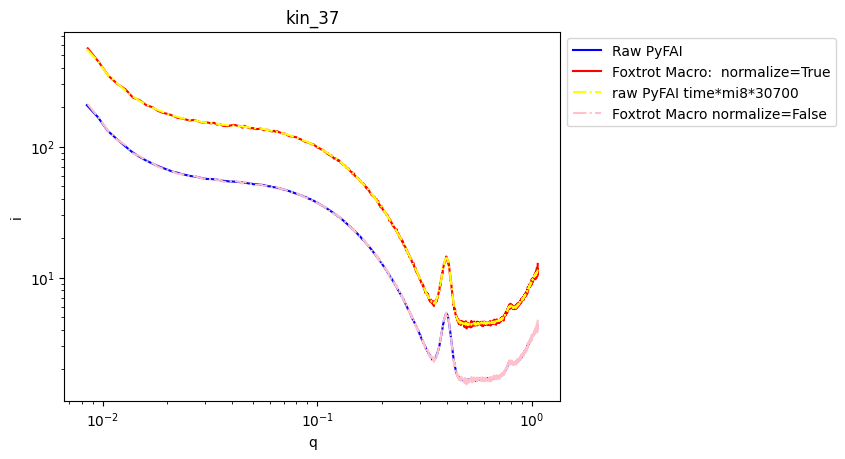

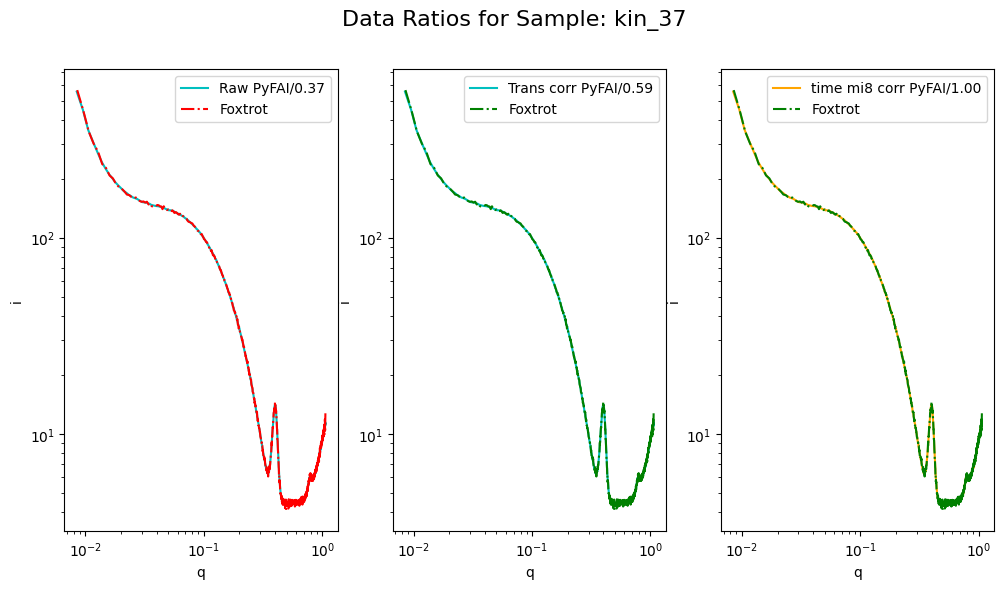

In [10]:
sample = 'kin_37'
pyFAI_raw_path = 'D:/SWING/to_do/kin_37_au_62tes_s/S_C_2_SF_3_P_48_09573/integration/rodriguez_09573_2024-10-13_18-07-02_integration_mean.txt'
trans_pyFAI_path = 'D:/SWING/to_do/kin_37_au_62tes_s/S_C_2_SF_3_P_48_09573/transmission/rodriguez_09573_2024-10-13_18-07-02_transmission.txt'
foxtrot_path =  'C:/Users/cayez/Documents/DONNEES_SIMON/LPCNO/Synchrotron/SoleilSWING_octobre24/Notebook_traitement/pb_intensite/fichiers_rodriguez/09573_kin37.txt'
foxtot_modified_path = 'C:/Users/cayez/Documents/DONNEES_SIMON/LPCNO/Synchrotron/SoleilSWING_octobre24/Notebook_traitement/pb_intensite/fichiers_rodriguez/NormalizeFalse09573.txt'


i_pyFAI_raw, i_pyFAI_trans_corr,i_pyFAI_xtimexmi8 , q_pyFAI_raw, i_Foxtrot, q_Foxtrot,i_Foxtrot_modified, q_Foxtrot_modified = extract_numpy_from_files(pyFAI_raw_path, trans_pyFAI_path, foxtrot_path,foxtot_modified_path,4.8631e-8,250,1);
plot_data(i_pyFAI_raw, i_pyFAI_xtimexmi8 , q_pyFAI_raw, i_Foxtrot, q_Foxtrot, i_Foxtrot_modified, q_Foxtrot_modified,sample)
mean_ratio_raw, sigma_ratio_raw, mean_ratio_trans, sigma_ratio_trans,mean_ratio_time_mi8,sigma_ratio_time_mi8 = ratio(q_Foxtrot, i_Foxtrot,i_pyFAI_raw,i_pyFAI_trans_corr,i_pyFAI_xtimexmi8,q_pyFAI_raw)
print('mean_ratio_raw: ',f'{mean_ratio_raw:.2f}')
print('mean_ratio_trans: ',f'{mean_ratio_trans:.2f}')
print('----------')
print('sigma_ratio_raw: ',f'{sigma_ratio_raw:.4f}')
print('sigma_ratio_trans: ',f'{sigma_ratio_trans:.4f}')
plot_data_ratios(q_pyFAI_raw,i_pyFAI_raw,q_Foxtrot,i_Foxtrot,i_pyFAI_trans_corr,i_pyFAI_xtimexmi8,sample,mean_ratio_raw,mean_ratio_trans,mean_ratio_time_mi8)

- kin_44
---

time.mi8 = 0.240285
mean_ratio_raw:  0.74
mean_ratio_trans:  1.17
----------
sigma_ratio_raw:  0.0083
sigma_ratio_trans:  0.0131


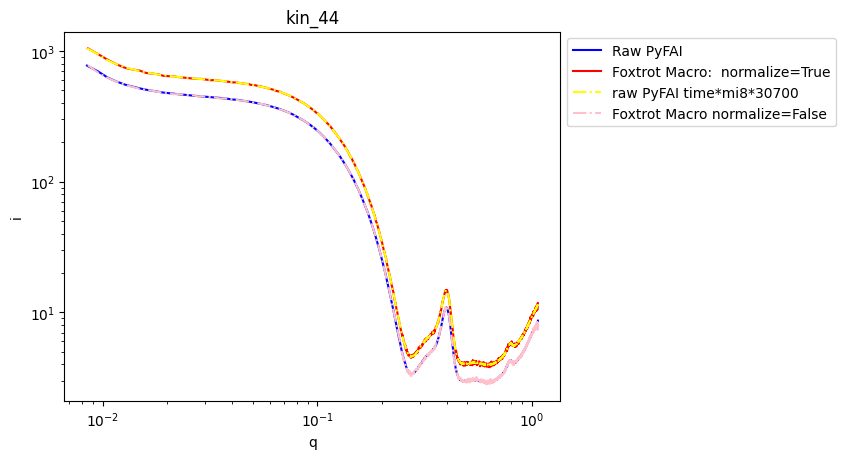

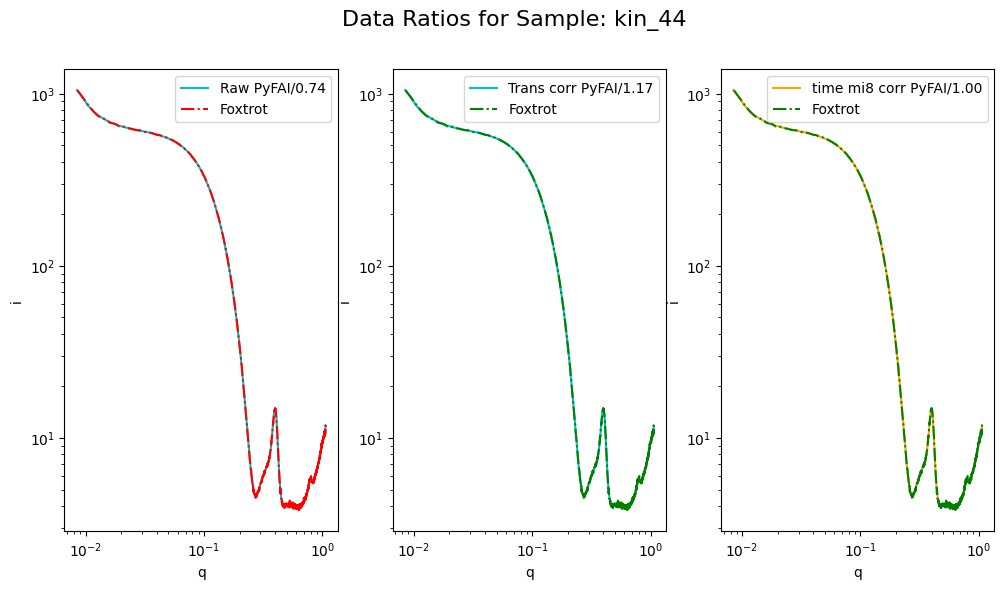

In [11]:
sample = 'kin_44'
pyFAI_raw_path =  'D:/SWING/to_do/kin_44_ag_80_tes480_s/S_C_2_SF_16_P_10_10743/integration/rodriguez_10743_2024-10-14_04-01-45_integration_mean.txt'
trans_pyFAI_path  = 'D:/SWING/to_do/kin_44_ag_80_tes480_s/S_C_2_SF_16_P_10_10743/transmission/rodriguez_10743_2024-10-14_04-01-45_transmission.txt'
foxtrot_path =  'C:/Users/cayez/Documents/DONNEES_SIMON/LPCNO/Synchrotron/SoleilSWING_octobre24/Notebook_traitement/pb_intensite/fichiers_rodriguez/kin44_raw_foxtrot.txt'
foxtot_modified_path = 'C:/Users/cayez/Documents/DONNEES_SIMON/LPCNO/Synchrotron/SoleilSWING_octobre24/Notebook_traitement/pb_intensite/fichiers_rodriguez/NormalizeFalse_10473.txt'

i_pyFAI_raw, i_pyFAI_trans_corr,i_pyFAI_xtimexmi8 , q_pyFAI_raw, i_Foxtrot, q_Foxtrot, i_Foxtrot_modified, q_Foxtrot_modified = extract_numpy_from_files(pyFAI_raw_path, trans_pyFAI_path, foxtrot_path,foxtot_modified_path,4.8057e-8,500,1);
plot_data(i_pyFAI_raw, i_pyFAI_xtimexmi8 , q_pyFAI_raw, i_Foxtrot, q_Foxtrot, i_Foxtrot_modified, q_Foxtrot_modified,sample)
mean_ratio_raw, sigma_ratio_raw, mean_ratio_trans, sigma_ratio_trans,mean_ratio_time_mi8,sigma_ratio_time_mi8 = ratio(q_Foxtrot, i_Foxtrot,i_pyFAI_raw,i_pyFAI_trans_corr,i_pyFAI_xtimexmi8,q_pyFAI_raw)
print('mean_ratio_raw: ',f'{mean_ratio_raw:.2f}')
print('mean_ratio_trans: ',f'{mean_ratio_trans:.2f}')
print('----------')
print('sigma_ratio_raw: ',f'{sigma_ratio_raw:.4f}')
print('sigma_ratio_trans: ',f'{sigma_ratio_trans:.4f}')
plot_data_ratios(q_pyFAI_raw,i_pyFAI_raw,q_Foxtrot,i_Foxtrot,i_pyFAI_trans_corr,i_pyFAI_xtimexmi8,sample,mean_ratio_raw,mean_ratio_trans,mean_ratio_time_mi8)

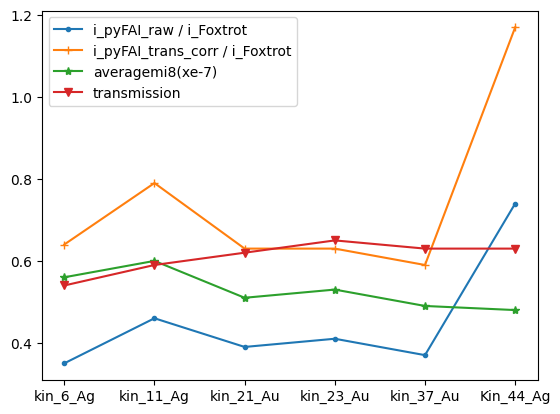

In [12]:
samples = ['kin_6_Ag','kin_11_Ag','kin_21_Au','kin_23_Au','kin_37_Au','Kin_44_Ag']
ratios_raw = [0.35,0.46,0.39,0.41,0.37,0.74]
ratio_trans = [0.64,0.79,0.63,0.63,0.59,1.17]
averagemi8 = [0.56,0.6,0.51,0.53,0.49,0.48]
transmissions = [0.54,0.59,0.62,0.65,0.63,0.63]

fig,ax = plt.subplots()
ax.plot(samples,ratios_raw, marker='.',label = 'i_pyFAI_raw / i_Foxtrot')
ax.plot(samples,ratio_trans ,marker='+',label = 'i_pyFAI_trans_corr / i_Foxtrot')
ax.plot(samples,averagemi8 ,marker='*',label = 'averagemi8(xe-7)')
ax.plot(samples,transmissions ,marker='v',label = 'transmission')

ax.legend()





